# Multi-objective

In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.indicators.igd import IGD
from pymoode.algorithms import GDE3, NSDE
from pymoode.survival import RankAndCrowding
from pymoode.performance import SpacingIndicator

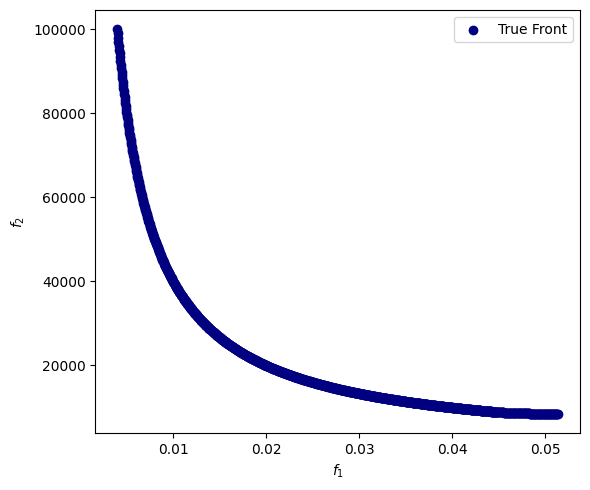

In [2]:
problem = get_problem("truss2d")
pf = problem.pareto_front()

fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
NGEN = 250
POPSIZE = 100
SEED = 5

In [4]:
gde3 = GDE3(
    pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), de_repair="bounce-back",
    survival=RankAndCrowding(crowding_func="cd"),
)

res_gde3 = minimize(
    problem,
    gde3,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

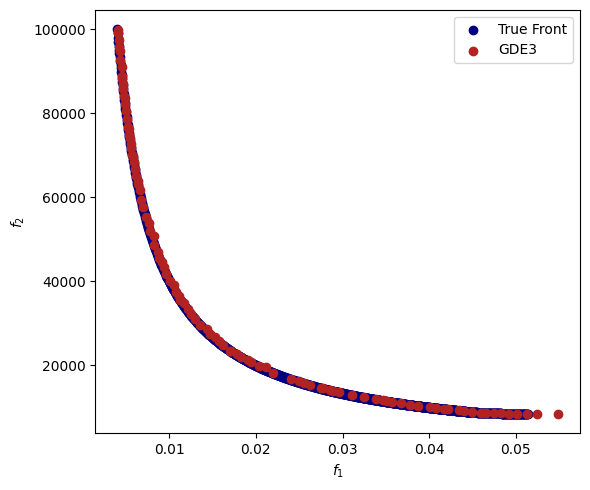

In [5]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [6]:
gde3p = GDE3(
    pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), de_repair="bounce-back",
    survival=RankAndCrowding(crowding_func="pcd"),
)

res_gde3p = minimize(
    problem,
    gde3p,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

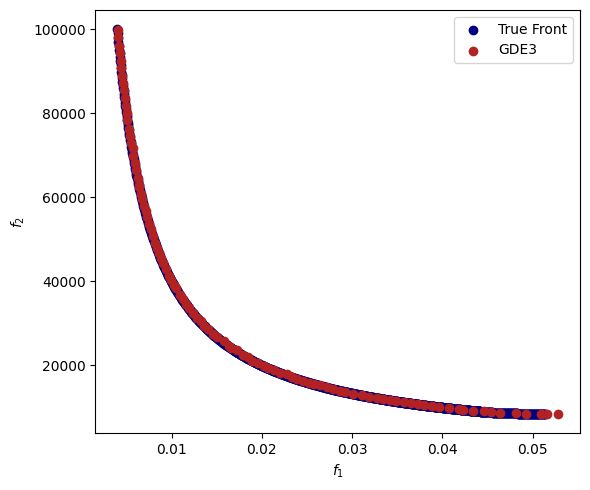

In [7]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3p.F[:, 0], res_gde3p.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [8]:
sp = SpacingIndicator(pf=problem.pareto_front(), zero_to_one=True)

The lesser the spacing, the more even the distribution of elements

In [9]:
print("Spacing of normal crowding distances: ", sp.do(res_gde3.F))
print("Spacing of pruning crowding distances: ", sp.do(res_gde3p.F))

Spacing of normal crowding distances:  0.007531202373576977
Spacing of pruning crowding distances:  0.0032956432593306034


In [10]:
igd = IGD(pf=problem.pareto_front(), zero_to_one=True)

In [11]:
print("IGD of normal crowding distances: ", igd.do(res_gde3.F))
print("IGD of pruning crowding distances: ", igd.do(res_gde3p.F))

IGD of normal crowding distances:  0.005859828655308572
IGD of pruning crowding distances:  0.004744463013355145
